In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/EPITECH/TEK5/Data-tests/KaDo.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [7]:
df.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [5]:
df.head()

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281


In [9]:
df.groupby(['CLI_ID'])

CLI_ID
1490281       5
13290776      9
20163348      1
20200041      2
20561854      3
             ..
997048745     4
997048751     5
997048769    10
997048777    19
997385337    23
Name: CLI_ID, Length: 853514, dtype: int64

In [11]:
df = df.query('CLI_ID == 997385337')

In [12]:
to_drop = ['TICKET_ID', 'MOIS_VENTE', 'UNIVERS', 'MAILLE', 'LIBELLE', 'CLI_ID']
df.drop(to_drop, inplace=True, axis=1)

In [13]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.1*len(df)), int(.8*len(df))])

In [15]:
train = df

In [16]:
train.size

46

In [18]:
categories = [col for col in train.columns if train[col].dtypes == 'O']
categories

['FAMILLE']

In [17]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [19]:
train_encoded = pd.DataFrame(ohe.fit_transform(train[categories]), columns=ohe.get_feature_names(), index=train.index)

In [20]:
train_data = pd.concat([train_encoded, train.drop(categories, axis=1)], axis=1)

In [21]:
train_data

,x0_MAQUILLAGE,x0_SOINS DU CORPS,x0_SOLAIRES,PRIX_NET
7245499,0.0,0.0,1.0,5.00
7245500,0.0,0.0,1.0,5.00
7245501,0.0,0.0,1.0,6.50
7245502,1.0,0.0,0.0,1.95
7245503,1.0,0.0,0.0,3.90
7245504,1.0,0.0,0.0,8.95
7245505,0.0,1.0,0.0,5.95
7245506,0.0,1.0,0.0,4.95
7245507,0.0,0.0,1.0,3.95
7245508,1.0,0.0,0.0,4.45


In [22]:
pca = make_pipeline(StandardScaler(), PCA(0.95))

In [23]:
result = pca.fit_transform(train_data)

In [24]:
result.shape

(23, 3)

In [25]:
label = KMeans(n_clusters=8, random_state=0).fit_predict(result)

In [26]:
label

array([2, 2, 2, 1, 4, 3, 6, 6, 2, 4, 1, 1, 6, 1, 2, 5, 3, 4, 0, 7, 3, 3,
       4], dtype=int32)

In [27]:
u_labels = np.unique(label)

In [28]:
u_labels

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

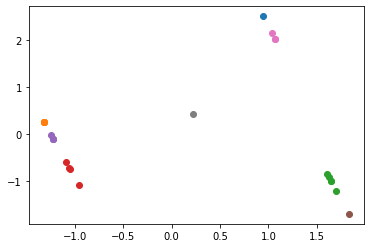

In [29]:
for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)